<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-leo0nel09/blob/main/08-09sep/Tarea08sep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

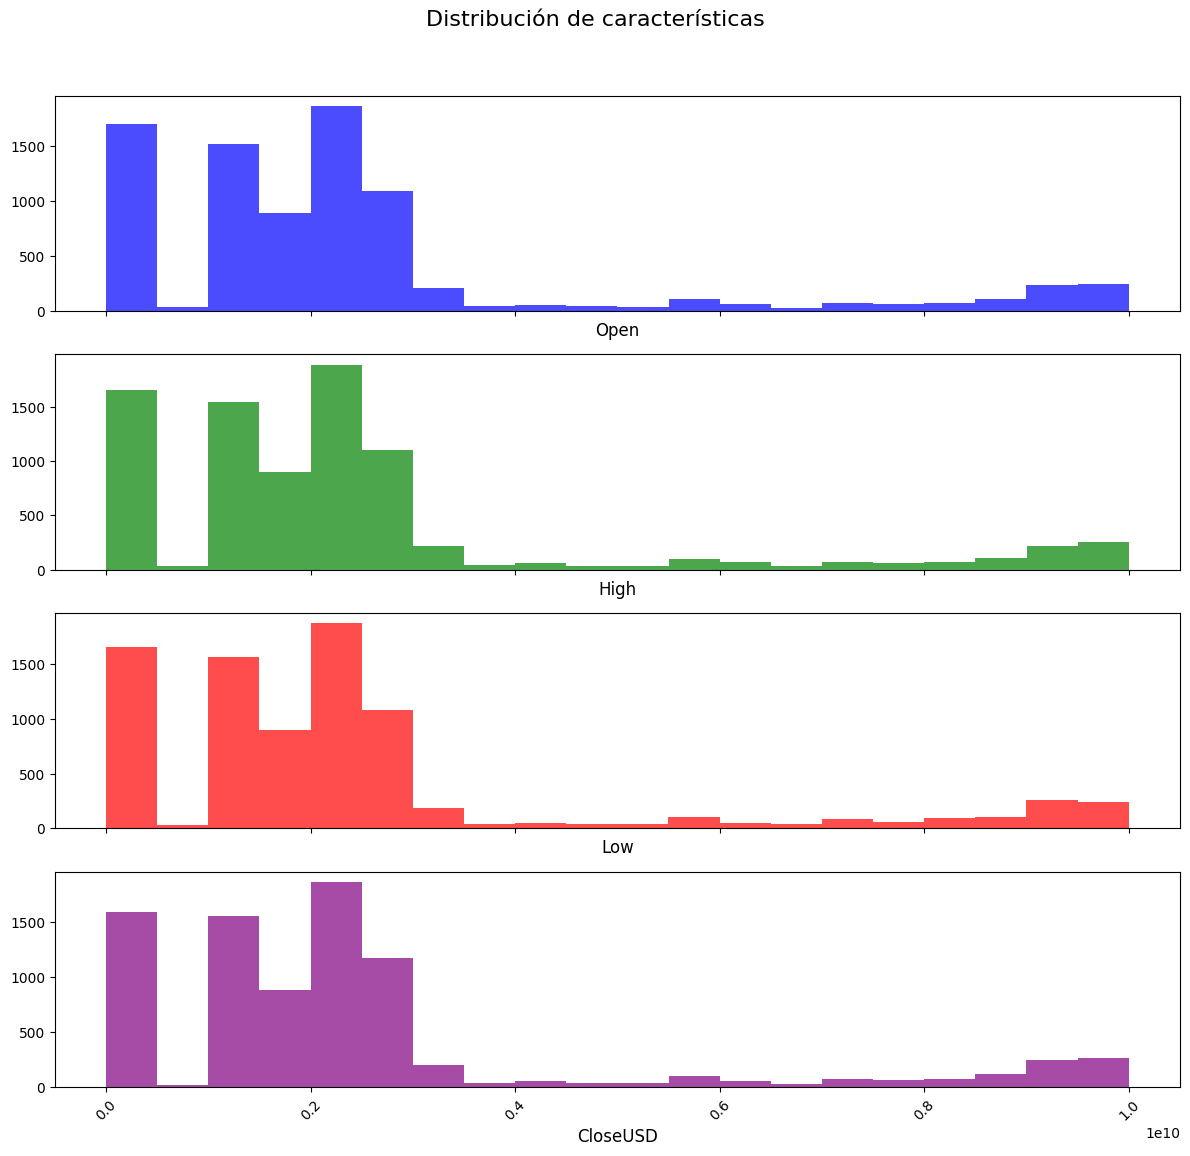

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Cargar el archivo Excel desde tu computadora
excel_file_path = '/content/Tarea_sklearn_Stock.xlsx'  # Reemplaza esto con la ruta real del archivo Excel
data = pd.read_excel(excel_file_path)

# Extraer los datos de las columnas "Open", "High", "Low" y "CloseUSD"
Open_array = data['Open'].values
High_array = data['High'].values
Low_array = data['Low'].values
Close_array = data['Close'].values
Date_array = data['Date']

# Crear gráficas para "Open", "High", "Low" y "CloseUSD" en función del tiempo
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
fig.suptitle('Distribución de características', fontsize=16)

# Antes de normalizar
axes[0].hist(Open_array, bins=20, color='blue', alpha=0.7)
axes[0].set_xlabel('Open', fontsize=12)

axes[1].hist(High_array, bins=20, color='green', alpha=0.7)
axes[1].set_xlabel('High', fontsize=12)

axes[2].hist(Low_array, bins=20, color='red', alpha=0.7)
axes[2].set_xlabel('Low', fontsize=12)

axes[3].hist(Close_array, bins=20, color='purple', alpha=0.7)
axes[3].set_xlabel('CloseUSD', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xticks(rotation=45)
plt.show()


SGDRegressor(learning_rate='constant')
number of iterations completed: 14, number of weight updates: 118889.0
model parameters:    w: [2.27694009e+09], b:[1.16105229e+06 6.38552231e+08 6.27339729e+08]


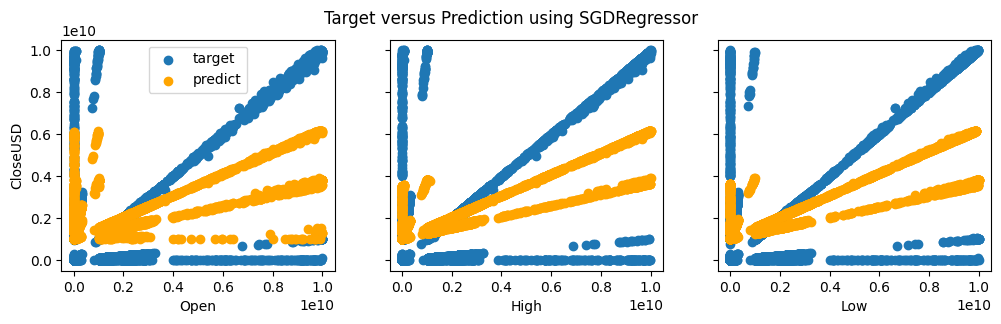

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Cargar el archivo Excel desde tu computadora
excel_file_path = '/content/Tarea_sklearn_Stock.xlsx'  # Reemplaza esto con la ruta real del archivo Excel
data = pd.read_excel(excel_file_path)

# Extraer los datos de las columnas "Open", "High", "Low" y "CloseUSD"
Open_array = data['Open'].values
High_array = data['High'].values
Low_array = data['Low'].values
Close_array = data['Close'].values
Date_array = data['Date']

# Crear un arreglo de características X y un arreglo de objetivos y (en este caso, Close_array)
X = np.column_stack((Open_array, High_array, Low_array))
y = Close_array

# Normalizar las características
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Crear y entrenar el modelo SGDRegressor
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(X_norm, y)

# Imprimir los parámetros del modelo
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:    w: {w0_norm}, b:{w_norm}")

# Predecir el objetivo utilizando las características normalizadas
yp = sgdr.predict(X_norm)

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)  # Cambia de 4 a 3
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y, label='target')
    ax[i].scatter(X[:, i], yp, color="orange", label='predict')
    ax[i].set_xlabel(["Open", "High", "Low"][i])
ax[0].set_ylabel("CloseUSD")
ax[0].legend()
fig.suptitle("Target versus Prediction using SGDRegressor")
plt.show()
